# Predicting the Sale Price of a House in Ames, Iowa

### Linear Modes and Model Evaluation

Libraries and functions to use:

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [112]:
# Create a function to calculate the y-predictions and residuals for a given model

def check_residual(model, model_name, x_train_data, y_train_data, x_test_data, y_test_data):
    
    # Check residuals for baseline model
    if model== 'Baseline':
        y_prediction = x_test_data.mean()
        y_predictions = []
        for i in range(0,len(y_test_data)):
            y_predictions.append(y_prediction)
        residuals = y_test_data - y_predictions
        
    # Calculate residuals and plot them 
    else:
        train_predictions = model.predict(x_train_data)
        train_residuals = y_train_data - train_predictions
        
        test_predictions = model.predict(x_test_data)
        test_residuals = y_test_data - test_predictions
        
        fig, axes = plt.subplots(1,2, figsize=(12,5))
        fig.suptitle(model_name + ' Model', fontsize=16)
        ax1 = axes[0]
        ax2 = axes[1]
        
        ax1.set_title('Residuals Scatterplot')
        ax1.set_xlabel("Predicted values")
        ax1.set_ylabel("Residuals")
        ax1.scatter(train_predictions, train_residuals, c = 'green', marker = '.', label = 'Training Data')
        ax1.scatter(test_predictions, test_residuals, c = 'blue', marker = '.', label = 'Testing Data')
        ax1.legend()
        ax1.hlines(y=0, xmin=10, xmax=13, color = 'red')
        
        ax2.set_title("Linear regression")
        ax2.set_xlabel("Predicted values")
        ax2.set_ylabel("Real values")
        ax2.scatter(train_predictions, y_train_data, c = 'green', marker = '.', label = "Training data")
        ax2.scatter(test_predictions, y_test_data, c = 'blue', marker = '.', label = "Testing data")
        ax2.legend()
        ax2.plot([11, 13], [11, 13], c = "red")
        
        plt.show()
    
    return 

In [113]:
# Create a function to calculate R2, MSE, RMSE

def evaluate_model(model, X, y):
    
    # Evalute baseline model
    if model == 'baseline':
        # Convert y_baseline to an array to calculate baseline metrics
        y_baseline = []
        for i in range(0,len(y)):
            y_baseline.append(X)
            
        print(f'Baseline: Avg Price = {X}')
        print(f'R2 Score: {r2_score(y, y_baseline)}')
        print(f'MSE: {mean_squared_error(y, y_baseline)}')
        print(f'RMSE: {np.sqrt(mean_squared_error(y, y_baseline))}')
        
    else:
    # Evaluate other models
        print(f'R2 Score: {r2_score(y, model.predict(X))}')
        print(f'MSE: {mean_squared_error(y, model.predict(X))}')
        print(f'RMSE: {np.sqrt(mean_squared_error(y, model.predict(X)))}')

In [114]:
# Load the data set for X train, X test, y train, y test in datasets folder
path = '../datasets/'
df   = pd.read_csv(path + 'new_features_cleaned_train.csv')

In [115]:
relevant_features = ['Overall Qual','Year Built','Total Bsmt SF','Gr Liv Area','TotRms AbvGrd',
 'Garage Cars','Garage Area','Exter Qual_TA','Foundation_PConc','Kitchen Qual_TA']

In [157]:
# Create feature matrix (X) and target vector (y)
X = df[relevant_features]
y = df['SalePrice_log']

In [158]:
# Perform a split of x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [159]:
# Scale data
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### Baseline model and residuals
The baseline for a predictive model for this problem is the average of the Sale Price.

In [166]:
avg_sale_price = y_train.mean()

Evaluate Baseline Model - Check Residuals

In [167]:
evaluate_model('baseline', avg_sale_price, y_test)

Baseline: Avg Price = 12.027370015222996
R2 Score: -0.0013615952114667262
MSE: 0.17042871404224227
RMSE: 0.4128301273432479


### Linear Regression Model and Residuals

In [160]:
# Linear Regression model
lr = LinearRegression()
lr.fit(Xs_train,y_train)

LinearRegression()

In [161]:
# Model Evaluation
lr.score(Xs_train, y_train), lr.score(Xs_test, y_test)

(0.8387119533981721, 0.8622225589051753)

In [162]:
# Cross Validation
cross_val_score(lr, Xs_train, y_train).mean()

0.8357858023777982

Check Residuals

In [163]:
evaluate_model(lr, Xs_test, y_test)

R2 Score: 0.8622225589051753
MSE: 0.02344930365025934
RMSE: 0.15313165463175582


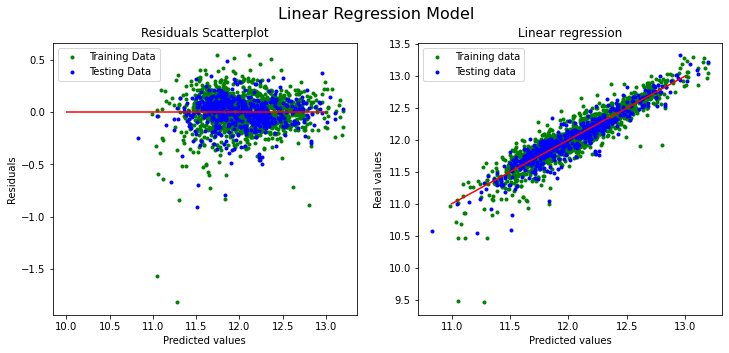

In [164]:
check_residual(lr, 'Linear Regression', Xs_train, y_train, Xs_test, y_test)

The histogram and scatterplot for the Simple Regression Model shows that the model is missing predicting well the outliers

The coefficients on the linear regression

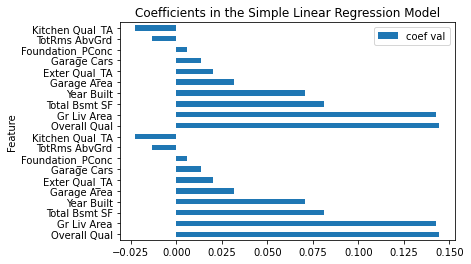

In [165]:
linear_coefficients = pd.DataFrame({
    'Feature' : X_train.columns,
    'coef val': lr.coef_    
}).set_index('Feature').sort_values('coef val', ascending=False)

linear_coefficients_summary = pd.concat([linear_coefficients.head(10),
                     linear_coefficients.tail(10)])
linear_coefficients_summary.plot(kind = "barh")
plt.title("Coefficients in the Simple Linear Regression Model")
plt.show()

Interpreting the coefficients : 

Holding all other features constant, for every 1 unit increase in 'Feature', we expect Sale Price to increase by 'coef val'. Example: Holding all other features constant, for every square feet increase in Ground Living area, we expect Sale Price to increase by $30,808.

These coefficients are very large. Will do other regressions models to apply regularization and shrink these coefficients.







### Ridge Regression

In [170]:
X = df.drop(columns = ['SalePrice_log', 'SalePrice'])
y = df['SalePrice_log']

In [171]:
# Perform a split of x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [172]:
r_alphas = np.logspace(0, 5, 100)

ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [173]:
ridge_cv.alpha_

20.565123083486515

In [174]:
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))

0.9161648041873264
0.914693750808203


In [175]:
evaluate_model(ridge_cv, X_test, y_test)

R2 Score: 0.914693750808203
MSE: 0.014518865531741077
RMSE: 0.12049425518148604


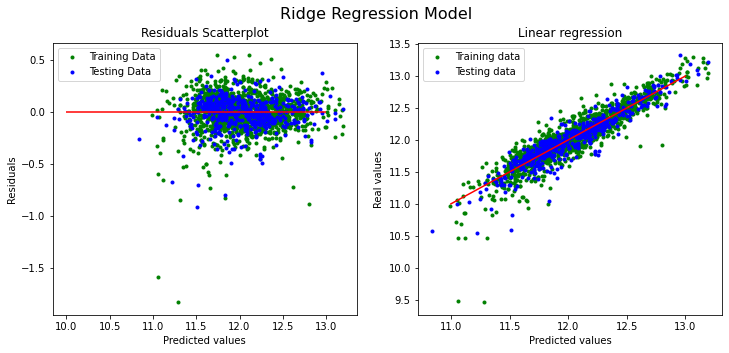

In [132]:
check_residual(ridge_cv, 'Ridge Regression', Xs_train, y_train, Xs_test, y_test)

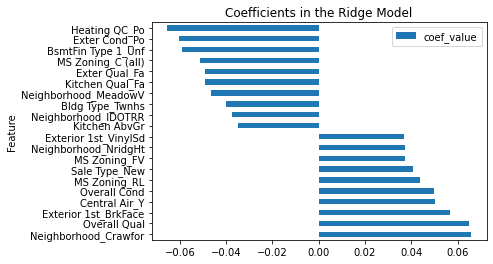

In [147]:
ridge_coefficients = pd.DataFrame({
                        'Feature': X.columns,
                        'coef_value': ridge_cv.coef_
                    }).set_index('Feature').sort_values('coef_value', ascending=False)

ridge_coefficients_summary = pd.concat([ridge_coefficients.head(10),
                     ridge_coefficients.tail(10)])
ridge_coefficients_summary.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

### Lasso Regression 

In [148]:
X = df.drop(columns = ['SalePrice_log', 'SalePrice'])
y = df['SalePrice_log']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [150]:
l_alphas = np.logspace(-3, 0, 100)

lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

lasso_cv.fit(X_train, y_train);

In [151]:
lasso_cv.alpha_

0.0010722672220103231

In [152]:
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.9061215538533127
0.9092529565381058


In [153]:
evaluate_model(lasso_cv, X_test, y_test)

R2 Score: 0.9092529565381058
MSE: 0.015444872256240295
RMSE: 0.1242774004243744


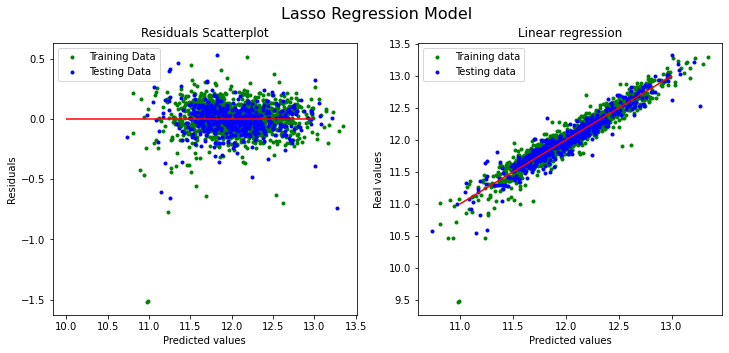

In [154]:
check_residual(lasso_cv, 'Lasso Regression', X_train, y_train, X_test, y_test)

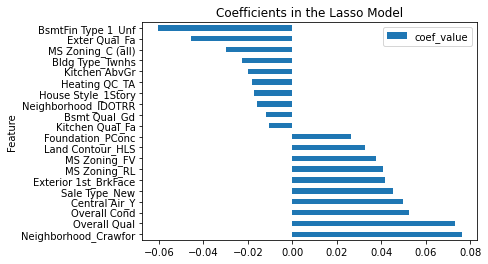

In [155]:
lasso_coefficients = pd.DataFrame({
                        'Feature': X.columns,
                        'coef_value': lasso_cv.coef_
                    }).set_index('Feature').sort_values('coef_value', ascending=False)

lasso_coefficients_summary = pd.concat([lasso_coefficients.head(10),
                     lasso_coefficients.tail(10)])
lasso_coefficients_summary.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Interpretation of Lasso Coefficient

An increase in one standard deviation of 'Feature', means an increase by ‘coef_value’ of the sale price (holding the rest of the features constant.) Example:
An increase in one standard deviation of Ground Living area, means an increase by $24,787.594384 of the sale price (holding the rest of the features constant.)